In [1]:
# Import necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Add the parent directory to the system path 
import os
import sys
sys.path.append(os.path.abspath(os.path.join('..')))

In [3]:
# importing modules from scripts 
from scripts.data_processing import *


In [4]:
# Read the .txt file as a CSV, using '|' as the delimiter
df = pd.read_csv('../data/MachineLearningRating_v3.txt', delimiter='|', low_memory=False)


In [5]:
df.head()

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


### Exploratory Data Analysis

In [6]:
# shape of the data 
df.shape

(1000098, 52)

There are 1000098 rows and 52 columns in the data.

In [7]:
# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null  object 
 13  Province                  1

In [8]:
# Display summary statistics
print(df.describe())

       UnderwrittenCoverID      PolicyID    PostalCode        mmcode  \
count         1.000098e+06  1.000098e+06  1.000098e+06  9.995460e+05   
mean          1.048175e+05  7.956682e+03  3.020601e+03  5.487770e+07   
std           6.329371e+04  5.290039e+03  2.649854e+03  1.360381e+07   
min           1.000000e+00  1.400000e+01  1.000000e+00  4.041200e+06   
25%           5.514300e+04  4.500000e+03  8.270000e+02  6.005692e+07   
50%           9.408300e+04  7.071000e+03  2.000000e+03  6.005842e+07   
75%           1.391900e+05  1.107700e+04  4.180000e+03  6.005842e+07   
max           3.011750e+05  2.324600e+04  9.870000e+03  6.506535e+07   

       RegistrationYear      Cylinders  cubiccapacity      kilowatts  \
count      1.000098e+06  999546.000000  999546.000000  999546.000000   
mean       2.010225e+03       4.046642    2466.743258      97.207919   
std        3.261391e+00       0.294020     442.800640      19.393256   
min        1.987000e+03       0.000000       0.000000       0.0

In [9]:
# Let's checkout individual columns
print(df.columns)

Index(['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth',
       'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language',
       'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province',
       'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode',
       'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders',
       'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors',
       'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser',
       'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff',
       'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet',
       'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm',
       'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section',
       'Product', 'StatutoryClass', 'StatutoryRiskType', 'TotalPremium',
       'TotalClaims'],
      dtype='object')


In [10]:
# Data Structure of each column 
df.dtypes

UnderwrittenCoverID           int64
PolicyID                      int64
TransactionMonth             object
IsVATRegistered                bool
Citizenship                  object
LegalType                    object
Title                        object
Language                     object
Bank                         object
AccountType                  object
MaritalStatus                object
Gender                       object
Country                      object
Province                     object
PostalCode                    int64
MainCrestaZone               object
SubCrestaZone                object
ItemType                     object
mmcode                      float64
VehicleType                  object
RegistrationYear              int64
make                         object
Model                        object
Cylinders                   float64
cubiccapacity               float64
kilowatts                   float64
bodytype                     object
NumberOfDoors               

### Data Quality Assessment

In [11]:
# Check for missing values
print(df.isnull().sum())

UnderwrittenCoverID               0
PolicyID                          0
TransactionMonth                  0
IsVATRegistered                   0
Citizenship                       0
LegalType                         0
Title                             0
Language                          0
Bank                         145961
AccountType                   40232
MaritalStatus                  8259
Gender                         9536
Country                           0
Province                          0
PostalCode                        0
MainCrestaZone                    0
SubCrestaZone                     0
ItemType                          0
mmcode                          552
VehicleType                     552
RegistrationYear                  0
make                            552
Model                           552
Cylinders                       552
cubiccapacity                   552
kilowatts                       552
bodytype                        552
NumberOfDoors               

In [12]:
# Check for duplicates
print(f"Number of duplicate rows: {df.duplicated().sum()}")

Number of duplicate rows: 0


In [13]:
# percentage of missing values 
calculate_missing_percentage(df)

The dataset has 9.74% missing values.


The below table presents a summary of missing data for various columns in a dataset.

In [14]:
# Data Quality Assessment. # total missing values and it's percentage 
missing_data = check_missing_values(df)
missing_data

,Missing Values,% of Total Values,Data type
NumberOfVehiclesInFleet,1000098,100.00,float64
CrossBorder,999400,99.93,object
CustomValueEstimate,779642,77.96,float64
Rebuilt,641901,64.18,object
Converted,641901,64.18,object
WrittenOff,641901,64.18,object
NewVehicle,153295,15.33,object
Bank,145961,14.59,object
AccountType,40232,4.02,object
Gender,9536,0.95,object


The dataframe contains 52 columns.
22 columns have missing values.

### Handling Missing values 

drop columns with high percentage of missing values (>50%): 
- NumberOfVehiclesInFleet(100% missing)
- CrossBorder (99.93 %)
- CustomValueEstimate(77.96%)
- Rebuilt(64.18%)
- Converted(64.18%)
- WrittenOff(64.18%)

In [15]:
# Drop columns with missing values above the specified threshold(50%).
df_cleaned= drop_high_missing_columns(df)

Dropped columns: ['CustomValueEstimate', 'WrittenOff', 'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet']


for the rest of the data
- For categorical columns, impute missing values using the mode (most frequent value). 
- For numerical columns, it uses the median to fill in missing values.

In [16]:
df= impute_missing_values(df_cleaned)

check remaining missing values

In [17]:
# Data Quality Assessment. # total missing values and it's percentage 
missing_data = check_missing_values(df)
missing_data

,Missing Values,% of Total Values,Data type
UnderwrittenCoverID,0,0.0,int64
PolicyID,0,0.0,int64
TransactionMonth,0,0.0,object
IsVATRegistered,0,0.0,bool
Citizenship,0,0.0,object
LegalType,0,0.0,object
Title,0,0.0,object
Language,0,0.0,object
Bank,0,0.0,object
AccountType,0,0.0,object


## Univariate Analysis

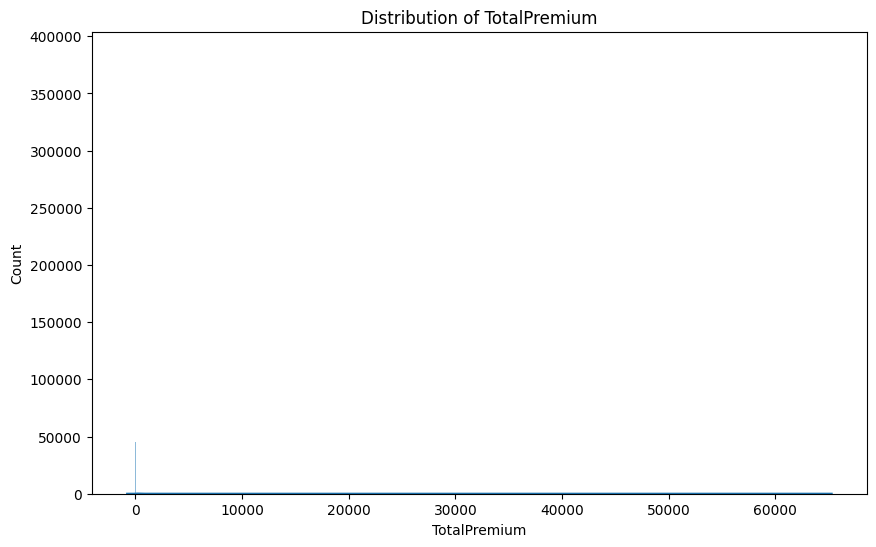

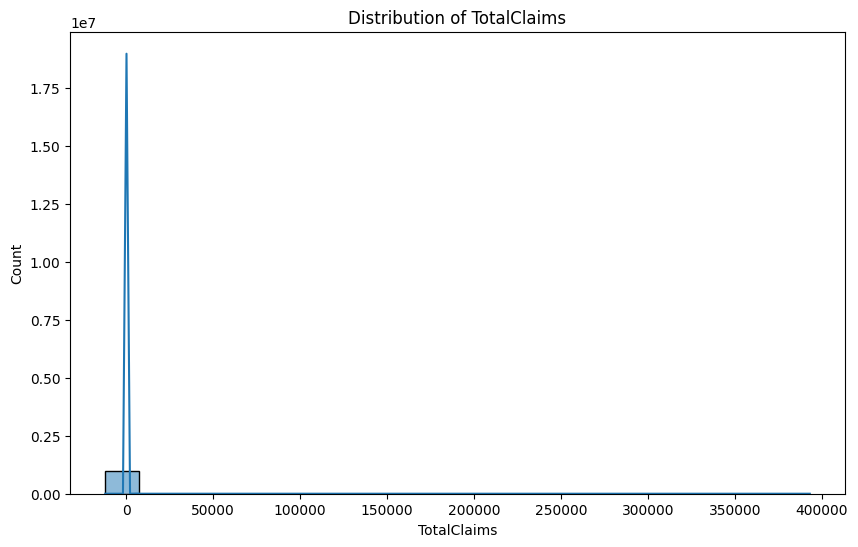

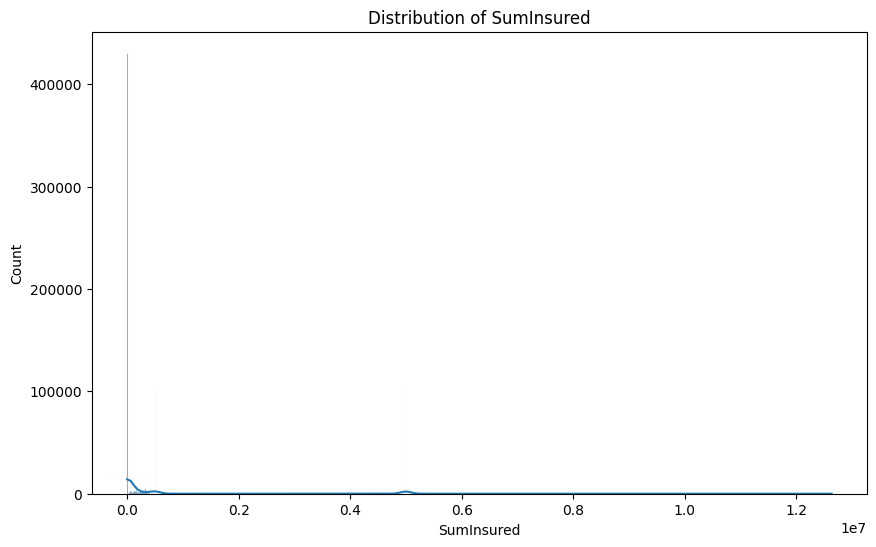

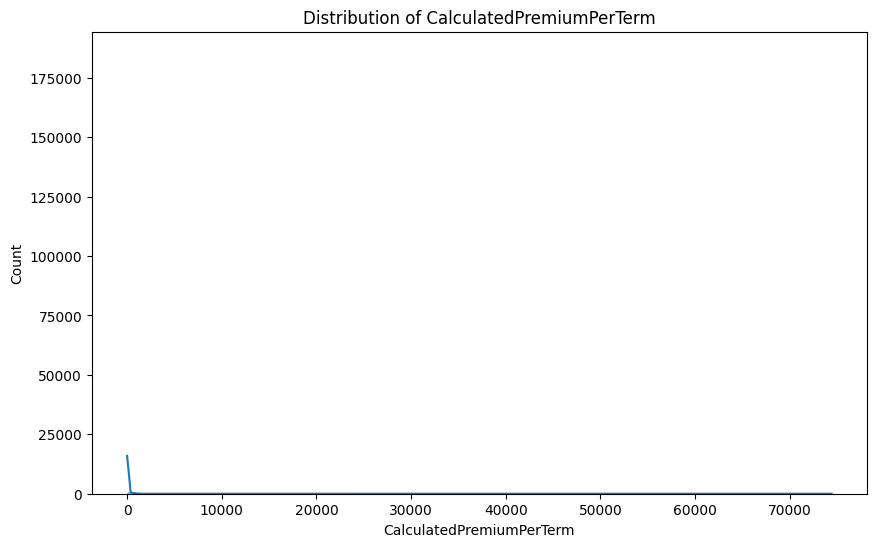

In [19]:
#  univariate analysis for key some numerical columns

#numerical_columns = df.select_dtypes(include=[np.number]).columns
numerical_columns= ['TotalPremium',	 'TotalClaims', 'SumInsured', 'CalculatedPremiumPerTerm']
for col in numerical_columns:
    plot_numeric_distribution(df, col)

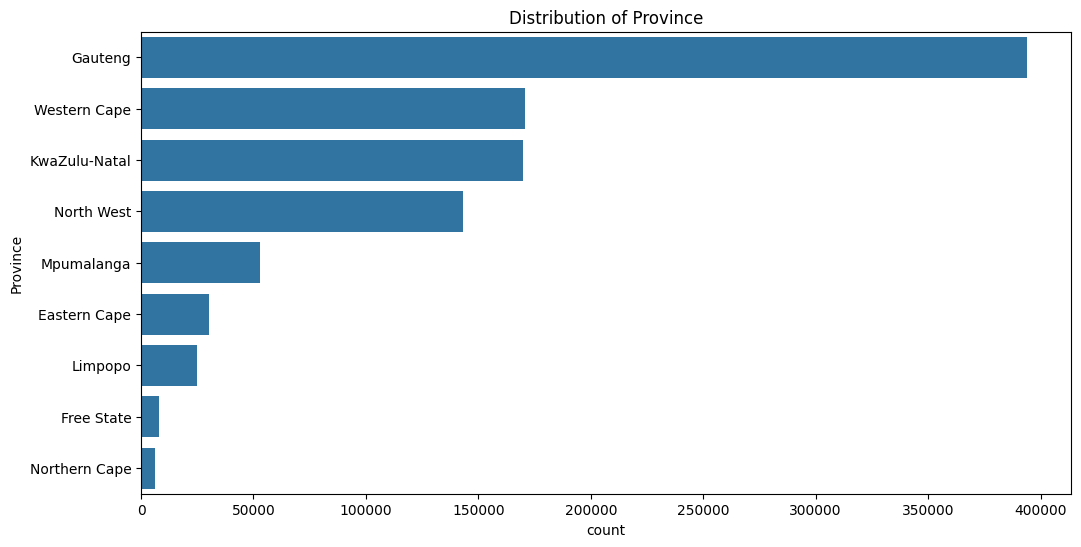

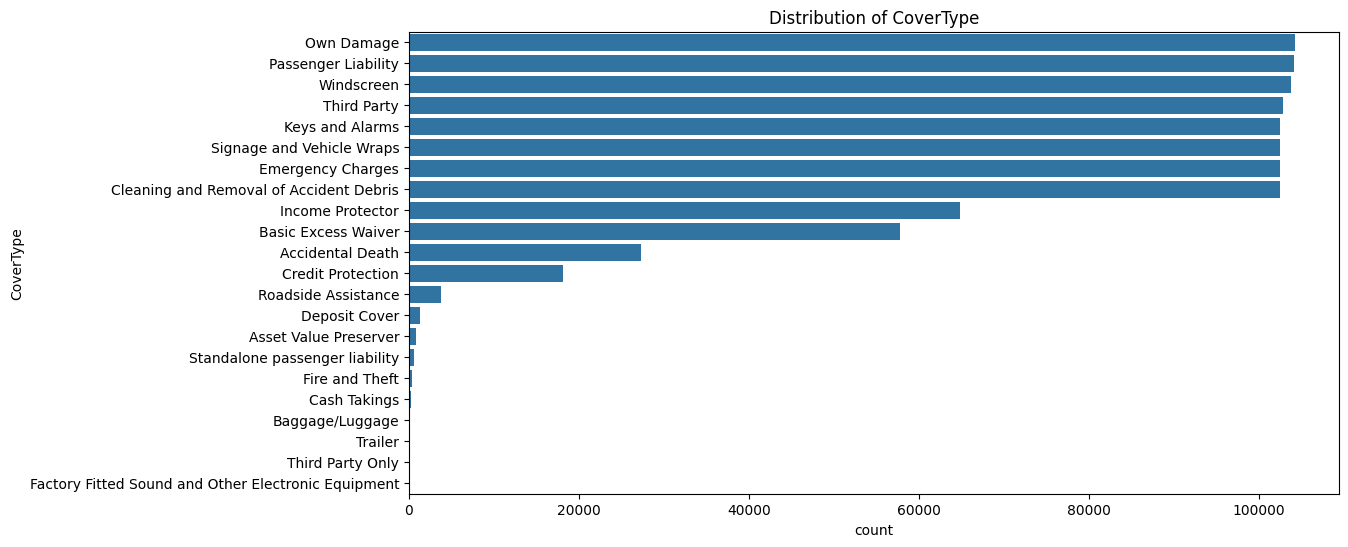

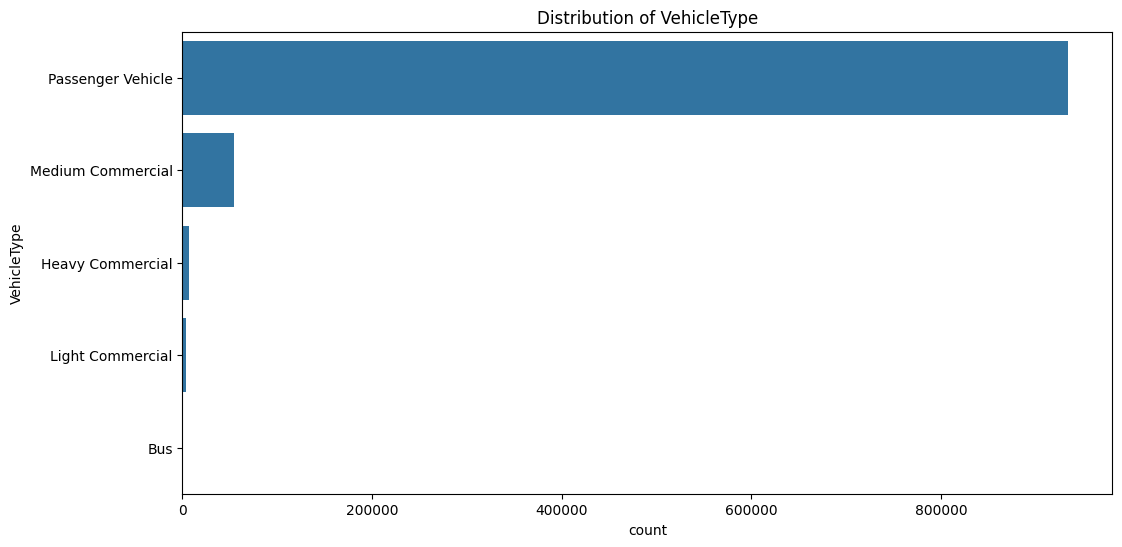

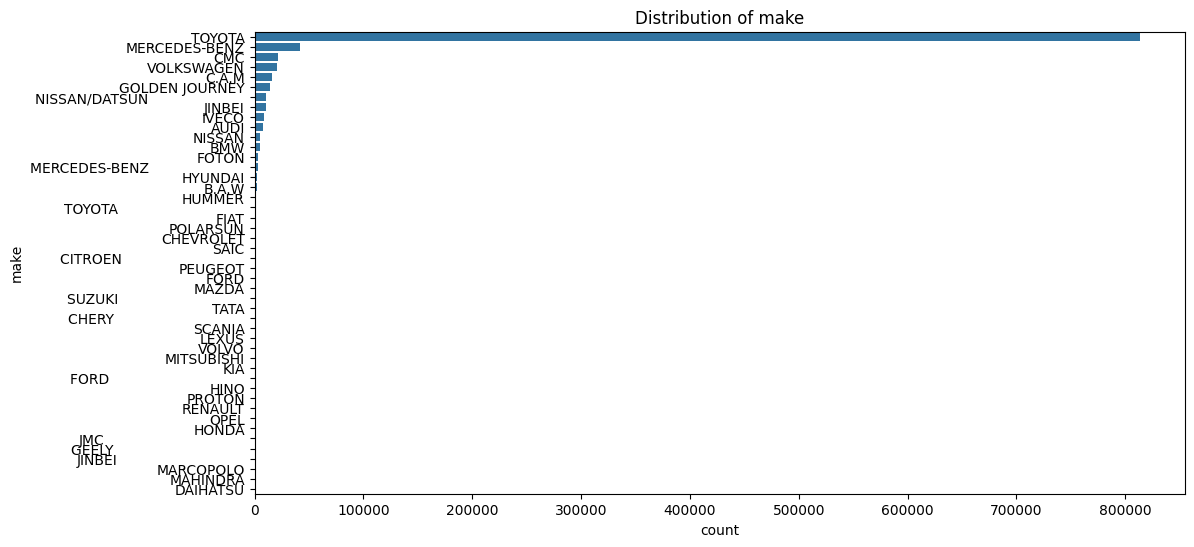

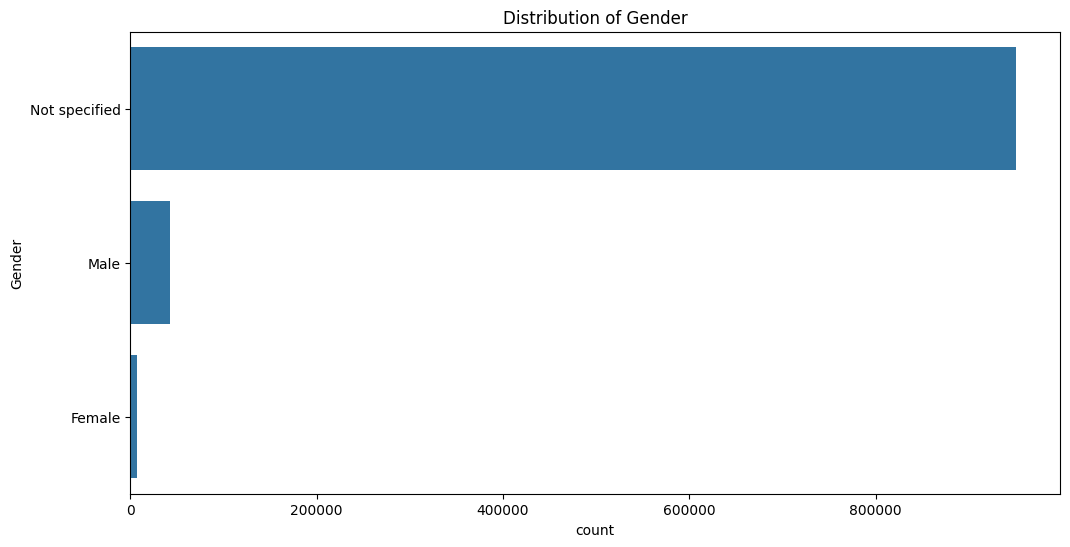

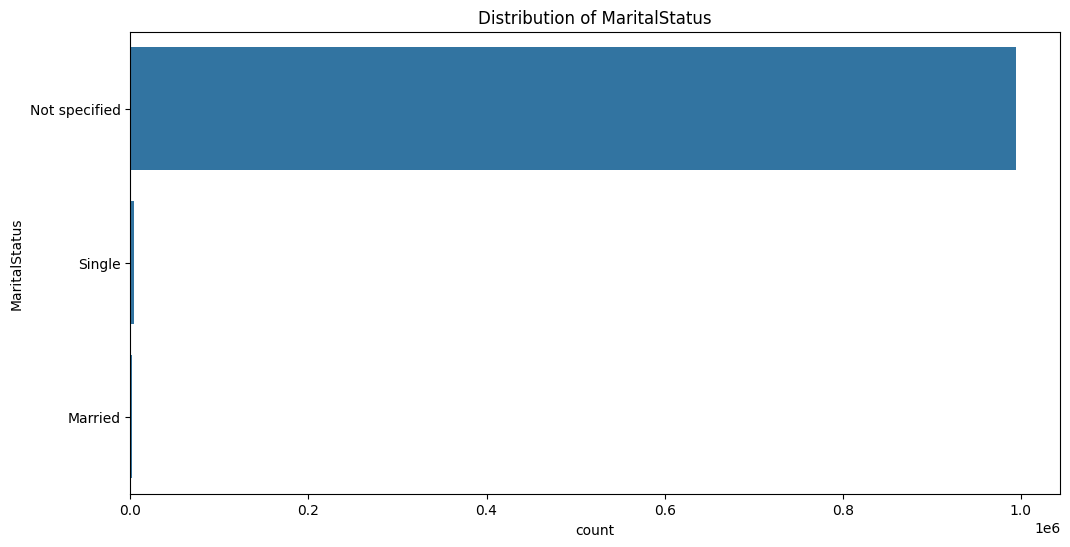

In [20]:
# univariate analysis for some key categorical columns 

#categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns=['Province', 'CoverType', 'VehicleType', 'make', 'Gender', 'MaritalStatus']
for col in categorical_columns:
    plot_categorical_distribution(df, col)

## Bivariate Analysis

In [22]:
# Bivariate Analysis
#corr_fig = plot_correlation_matrix(df, ['TotalPremium', 'TotalClaim', 'PostalCode'])
#corr_fig.savefig('correlation_matrix.png')

#scatter_fig = scatter_plot_by_zipcode(df, 'TotalPremium', 'TotalClaim', 'PostalCode')
#scatter_fig.savefig('premium_vs_claim_by_zipcode.png')

In [23]:
# Univariate Analysis for numerical columns 
#numeric_cols = df.select_dtypes(include=[np.number]).columns
#for col in numeric_cols:
 #   plt.figure(figsize=(10, 6))
  #  sns.histplot(df[col], kde=True)
   # plt.title(f'Distribution of {col}')
    #plt.show()

## Outlier Detection

In [24]:
# Outlier Detection
#box_fig = plot_boxplots(df, ['TotalPremium', 'TotalClaim'])
#box_fig.savefig('boxplots.png')

In [25]:
# Data Comparison
# create additional functions and visualizations to compare insurance cover type, premium, auto make, etc. across geographies

# Visualization
# Create 3 creative plots based on your findings from the EDA